In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy

In [2]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [3]:
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

G can be grown by one edge at a time with the following

In [4]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)

In [5]:
G.add_edges_from([(1, 2), (1, 3)])

In [6]:
G.clear()

In [7]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

Number of nodes/edges:


In [8]:
G.number_of_nodes()
G.number_of_edges()

3

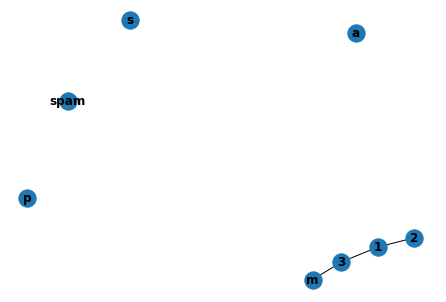

In [9]:
nx.draw(G, with_labels=True, font_weight='bold')

## DiGraph

In [10]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]
print(list(DG.predecessors(2)))

[1]


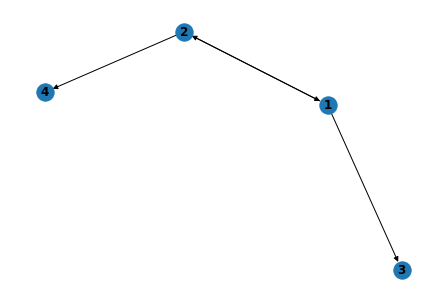

In [11]:
nx.draw(DG, with_labels=True, font_weight='bold')

# Examining elements of a graph

In [12]:
list(G.nodes)
list(G.edges)
list(G.adj[1])  # or list(G.neighbors(1))
G.degree[1]  # the number of edges incident to 1

2

In [13]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [14]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

# Removing elements from a graph
This works similar to adding

In [15]:
G.remove_node(2)
G.remove_nodes_from("spam")
G.remove_edge(1, 3)

# Graph constuctors
Graph constructors do not have to built up incrementally. The data. taht specifies the graph can be passed to a constructor of a given graph class.

In [16]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())

edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

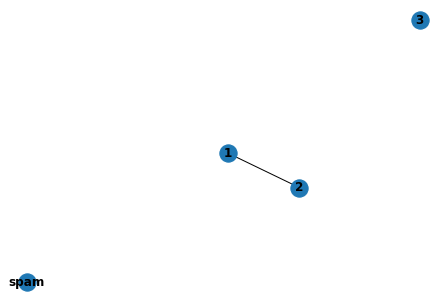

In [17]:
nx.draw(G, with_labels=True, font_weight='bold')

# Accessing edges and neighbors


In [18]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]
G[1][2] # same as G.edges[1,2]

{'color': 'yellow'}

In [19]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 3]
G[1][2]


{'color': 'red'}

In [20]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")


(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [21]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")


(1, 2, 0.125)
(3, 4, 0.375)


# Adding attributes to graphs, nodes, and edges

## Creating graph attributes

In [22]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

### Modifying graph attrubute

In [23]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

## Node attributes

In [24]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

## Edge Attributes

In [25]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

# Directed Graph

In [26]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')
# list(DG.successors(1))
# list(DG.neighbors(1))

1.25

In [27]:
H = nx.Graph(G) # Created an undirected graph from a directed graph

# Multigraphs
NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The MultiGraph and MultiDiGraph classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are well defined, e.g., MultiGraph.degree() we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

In [28]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]